# Regularization

### L1과 L2의 특징

In [2]:
import matplotlib.pyplot as plt
import numpy as np

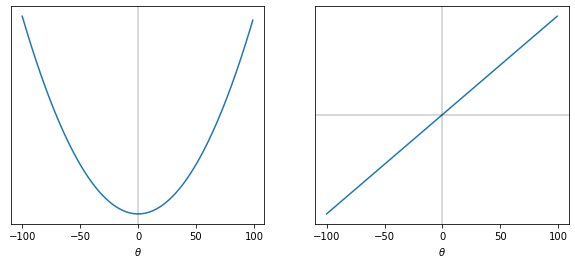

In [51]:
x = np.arange(-100,100)

y1 = x**2
y2 = 2*x

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x, y1)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')

plt.subplot(1,2,2)
plt.plot(x,y2)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')
plt.axhline(y=0, lw=0.3, c ='black')

plt.savefig('L2.png')

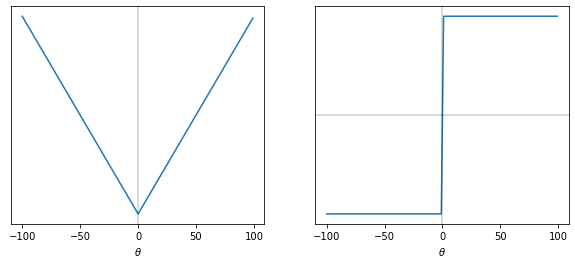

In [52]:
x = np.arange(-100,100)

y1 = abs(x)
y2 = np.sign(x)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x, y1)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')

plt.subplot(1,2,2)
plt.plot(x,y2)
plt.yticks([])
plt.xlabel(r'$\theta$')
plt.axvline(x=0, lw=0.3, c ='black')
plt.axhline(y=0, lw=0.3, c ='black')

plt.savefig('L1.png')

### Regularization 사용하기

### L2 Regularization

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

class mymodel(nn.Module):
    
    def __init__(self):
        super(mymodel, self).__init__()
        self.fc1 = nn.Linear(10,10)
        self.fc2 = nn.Linear(10,2)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

model = mymodel()

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0.001
)

### L1 Regularization
- Pytorch에서 제공하지 않기 때문에 따로 구현을 해야한다.
- L1 Loss를 따로 구현한 후에 학습 과정에서 Loss를 합쳐주면 된다.

In [66]:
L1_loss = 0
for param in model.parameters():
    L1_loss = L1_loss + torch.sum(abs(param))
    
print(L1_loss)

tensor(20.5460, grad_fn=<AddBackward0>)


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim

model = mymodel()

optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()


EPOCH = 10

for e in range(1, EPOCH+1):
    model.train()
    running_loss = 0
    
    for i, data in enumerate(trainloader):
        images, labels = data
        
        optimizer.zero_grad()
        outputs = model(images)
        
        MSE_Loss = loss_func(outputs, labels) # MSE loss
        
        L1_Loss = 0
        for param in model.parameters():
            L1_loss += torch.sum(abs(param))
            
        Loss = MSE_Loss + a * L1_Loss 
        
        Loss.backward()
        optimizer.step()
        
        running_loss += Loss
        now = time.time()
        print('\r[%d/%d]-----[%d/%d] LOSS : %.3f' %(e, EPOCH, i, 60000/128), end = '')
        
    print('\n')

MSELoss()